## CS 156a HW1 P7-10
### Author: Liting Xiao. Date: Oct 7, 2019.

This notebook:
- creates target functions of a line separating 2 classes {-1, 1}
- generates linearly seperable training/test sets
- implements the Perceptron Learning Algorithm (**PLA**)
- tests PLA's performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create target func f(x) = mx + b
# input space is [-1, 1] x [-1, 1]
def create_target_func():
    (x1, y1), (x2, y2) = np.random.uniform(-1, 1, (2, 2))
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m, b

In [3]:
# defining point x_n above the line having y_n = 1
# while below the line having y_n = -1
def create_data_set(N, m, b):
    X = np.random.uniform(-1, 1, (2, N))
    Y = np.sign(X[1, :] - m * X[0, :] - b)
    return X, Y

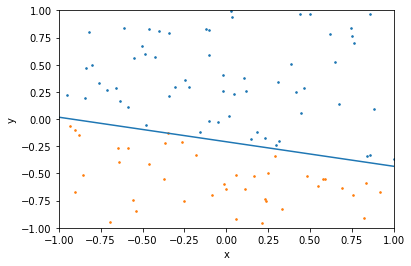

In [4]:
# visualize the target function and dataset for 100 points
m, b = create_target_func()
X, Y = create_data_set(100, m, b)

plt.plot([-1, 1], [-m+b, m+b])
plt.scatter(X[0, Y==1], X[1, Y==1], s=2.5)
plt.scatter(X[0, Y==-1], X[1, Y==-1], s=2.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# create PLA for training
def pla(N_pt, N_exp = 1000):
    
    # iterate runs
    conv_list = []
    for _ in range(N_exp):
        # create training set
        m, b = create_target_func()
        X, Y = create_data_set(N_pt, m, b)
        
        # shuffle the dataset
        shuffle_idx = np.random.permutation(len(Y))
        X, Y = X[:, shuffle_idx], Y[shuffle_idx]
        
        # initialize weights
        w = np.zeros(X.shape[0] + 1)
        
        # add x0 = 1 term
        xcheck = np.vstack((np.ones(N_pt), X)).T
        ycheck = np.sign(np.sum(w * xcheck, axis=1))
        
        # train
        conv = 0
        while sum(Y != ycheck) != 0:
            mask = (Y != ycheck)
            
            idx = np.random.randint(sum(mask))
            x = xcheck[mask][idx]
            y = Y[mask][idx]
                        
            w += y * x
            ycheck = np.sign(np.sum(w * xcheck, axis=1))
            conv += 1

        conv_list.append(conv)

    return m, b, w, np.mean(conv_list)

In [6]:
# training
N1 = 10
N2 = 100
m1, b1, w1, conv1 = pla(N1)
m2, b2, w2, conv2 = pla(N2)
print('Average number of iterations to converge for '
      '{} training points: {:.0f}'.format(N1, conv1))
print('Average number of iterations to converge for '
      '{} training points: {:.0f}'.format(N2, conv2))

Average number of iterations to converge for 10 training points: 10
Average number of iterations to converge for 100 training points: 144


In [7]:
# create test sets to test PLA results
def testTraining(N_test, m, b, w):
    testX, testY = create_data_set(N_test, m, b)
    x = np.vstack((np.ones(N_test), testX)).T
    y = np.sign(np.sum(w * x, axis=1))
    frac = sum(y != testY) / N_test
    return frac

# testing
N_test = 100000
prob1 = testTraining(N_test, m1, b1, w1)
prob2 = testTraining(N_test, m2, b2, w2)
    
print('For {} training points, P[f(x) != g(x)] ~ {:.3f}'
      .format(N1, prob1))
print('For {} training points, P[f(x) != g(x)] ~ {:.3f}'
      .format(N2, prob2))

For 10 training points, P[f(x) != g(x)] ~ 0.099
For 100 training points, P[f(x) != g(x)] ~ 0.028
